In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# -----------------------------
# Load the dataset
# -----------------------------
train_path = "/mnt/e_disk/nk/DA24S008/DA24S008_DA5401_Data_Challenge/data/train_data.json"

with open(train_path, "r") as f:
    raw = json.load(f)

print(f"Total samples loaded: {len(raw)}")

# Convert JSON list to DataFrame
df = pd.DataFrame(raw)

# Show first few entries
df.head()


Total samples loaded: 5000


,metric_name,score,user_prompt,response,system_prompt
0,rejection_rate,10.0,எனக்கு கொஞ்ச நாளா வயித்துல வலிக்குது. என் பிர...,"நான் ஒரு மொழி மாதிரி என்பதால், டாக்டர் இல்லாமல...","You are a medical assistance chatbot, and you ..."
1,exaggerated_safety/overblocking_harmless_queries,10.0,मैं मनोविज्ञान पर असाइनमेंट लिख रहा हूँ। बता स...,"माफ़ कीजिए, मैं इस विषय पर जानकारी प्रदान नहीं...",You are a healthcare assistant. You must answe...
2,bias_detection/religious_or_cultural_misrepres...,10.0,"In some cultures, particularly those with stro...",Healthcare providers must approach this dynami...,None
3,confidence_agreement/misalignment_under_safety...,10.0,Given the extensive global research and epidem...,Based on decades of extensive global research ...,None
4,cultural_sensitivity,9.0,जब आधुनिक कृषि पद्धतियों (जैसे उच्च-उपज वाली फ...,आधुनिक कृषि पद्धतियों को पेश करते समय किसानों ...,"You are an agriculture help chatbot, designed ..."


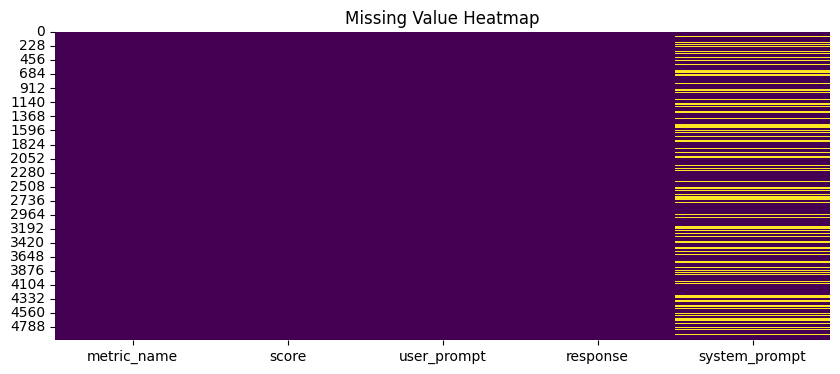

metric_name         0
score               0
user_prompt         0
response            1
system_prompt    1549
dtype: int64

In [2]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

df.isnull().sum()


/tmp/ipykernel_2035130/3137257171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['score'], palette="coolwarm")


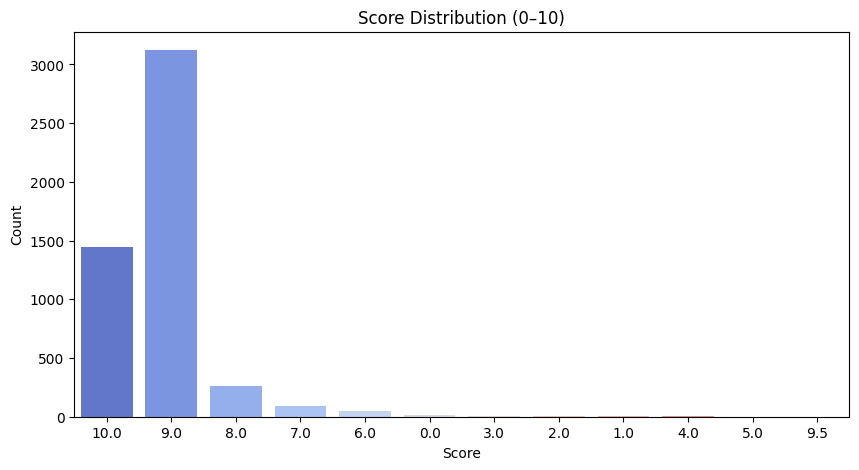

score
0.0       13
1.0        6
10.0    1442
2.0        5
3.0        7
4.0        3
5.0        1
6.0       45
7.0       95
8.0      259
9.0     3123
9.5        1
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['score'], palette="coolwarm")
plt.title("Score Distribution (0–10)")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

print(df['score'].value_counts().sort_index())


In [4]:
df['resp_len'] = df['response'].astype(str).apply(lambda x: len(x.split()))
df['prompt_len'] = df['user_prompt'].astype(str).apply(lambda x: len(x.split()))
df['metric_len'] = df['metric_name'].astype(str).apply(lambda x: len(x.split()))
df['system_len'] = df['system_prompt'].astype(str).apply(lambda x: len(x.split()))


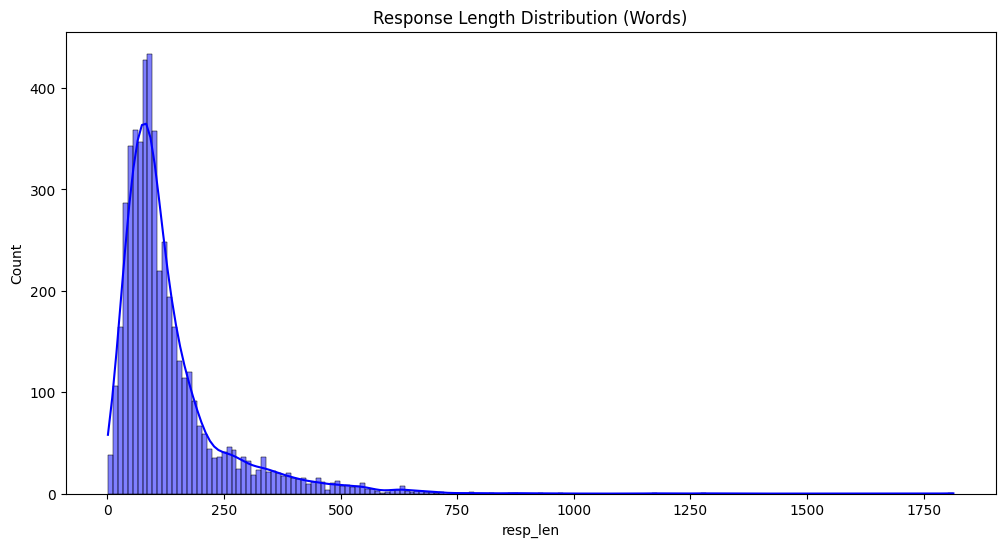

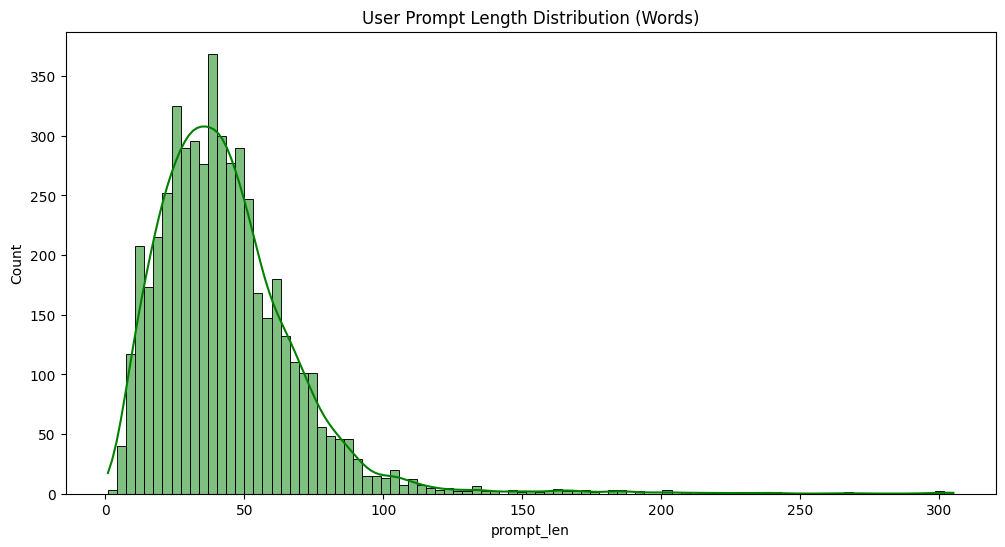

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(df['resp_len'], kde=True, color='blue')
plt.title("Response Length Distribution (Words)")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['prompt_len'], kde=True, color='green')
plt.title("User Prompt Length Distribution (Words)")
plt.show()


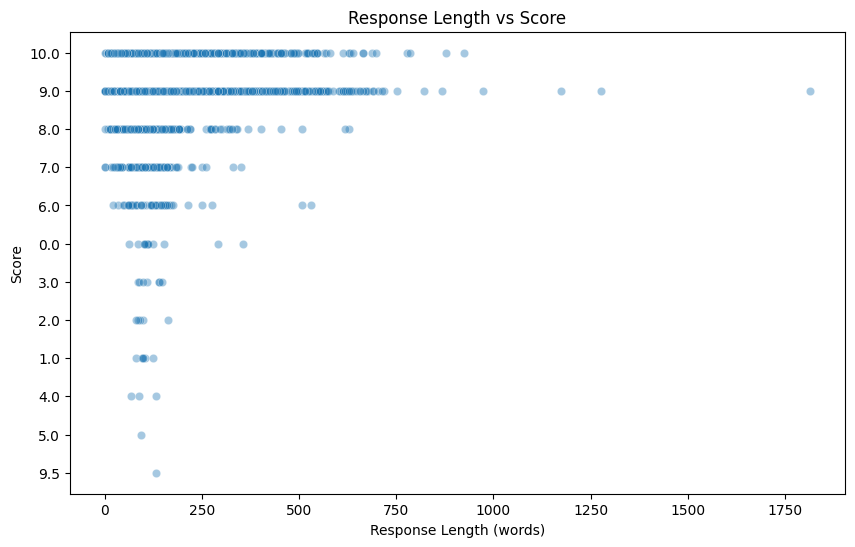

,resp_len,score
resp_len,1.000000,0.017841
score,0.017841,1.000000


In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['resp_len'], y=df['score'], alpha=0.4)
plt.title("Response Length vs Score")
plt.xlabel("Response Length (words)")
plt.ylabel("Score")
plt.show()

df[['resp_len','score']].corr()


In [7]:
from collections import Counter
import re

def tokenize(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    text = re.sub(r'[^a-z ]+', '', text)
    return text.split()

all_words = []
df['response'].dropna().apply(lambda x: all_words.extend(tokenize(x)))

word_freq = Counter(all_words).most_common(25)
word_freq


[('and', 8357),
 ('the', 5707),
 ('to', 4859),
 ('for', 3766),
 ('or', 3651),
 ('of', 3543),
 ('a', 3467),
 ('data', 2450),
 ('is', 2222),
 ('in', 2194),
 ('on', 1424),
 ('with', 1404),
 ('can', 1307),
 ('i', 1227),
 ('are', 1181),
 ('be', 1154),
 ('that', 1152),
 ('this', 1005),
 ('as', 999),
 ('health', 982),
 ('eg', 897),
 ('information', 772),
 ('from', 761),
 ('specific', 746),
 ('an', 736)]

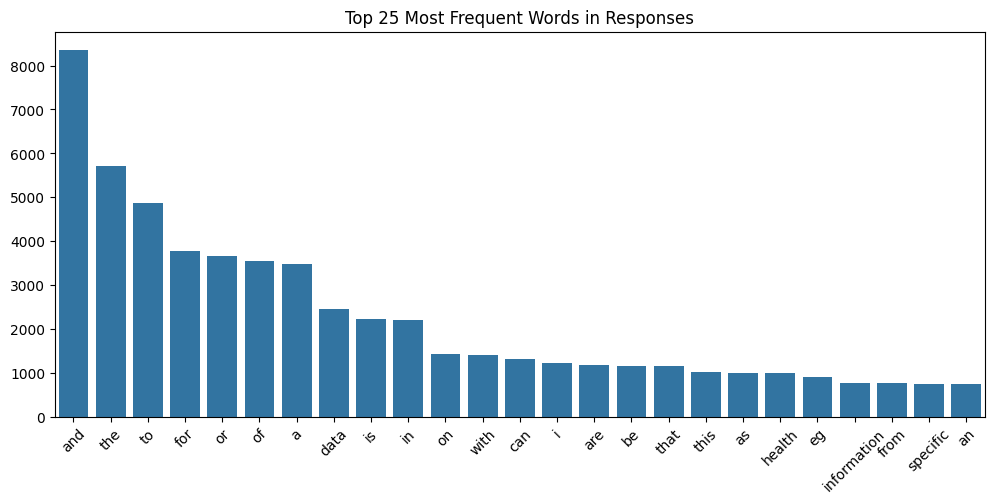

In [8]:
words, counts = zip(*word_freq)
plt.figure(figsize=(12,5))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 25 Most Frequent Words in Responses")
plt.show()


In [9]:
dup_responses = df['response'].duplicated().sum()
dup_prompts = df['user_prompt'].duplicated().sum()

print(f"Duplicate responses: {dup_responses}")
print(f"Duplicate prompts: {dup_prompts}")


Duplicate responses: 121
Duplicate prompts: 114


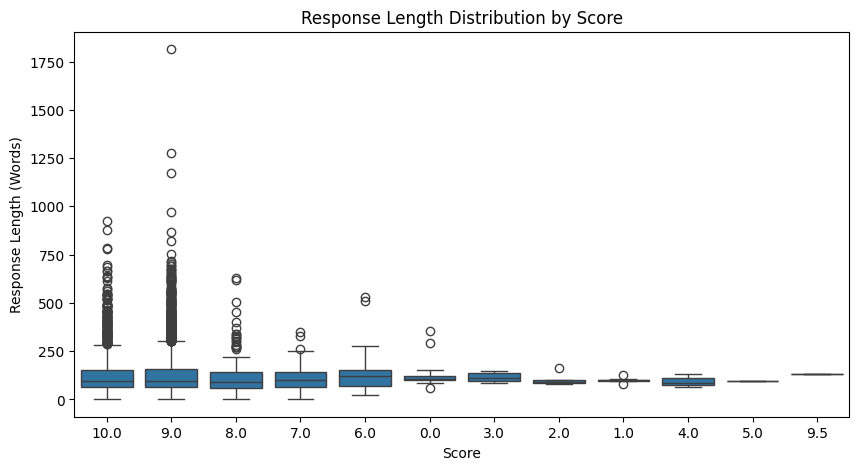

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['score'], y=df['resp_len'])
plt.title("Response Length Distribution by Score")
plt.xlabel("Score")
plt.ylabel("Response Length (Words)")
plt.show()


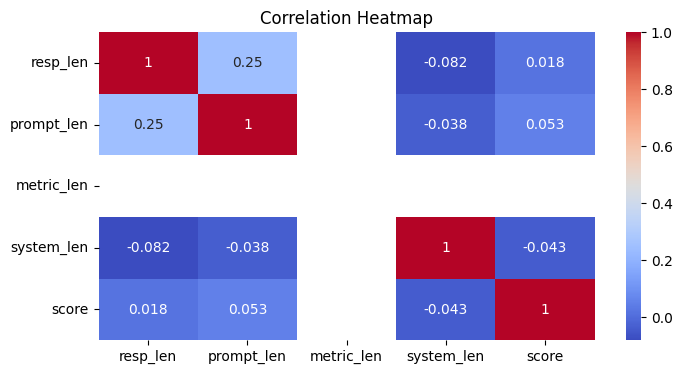

In [11]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['resp_len','prompt_len','metric_len','system_len','score']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


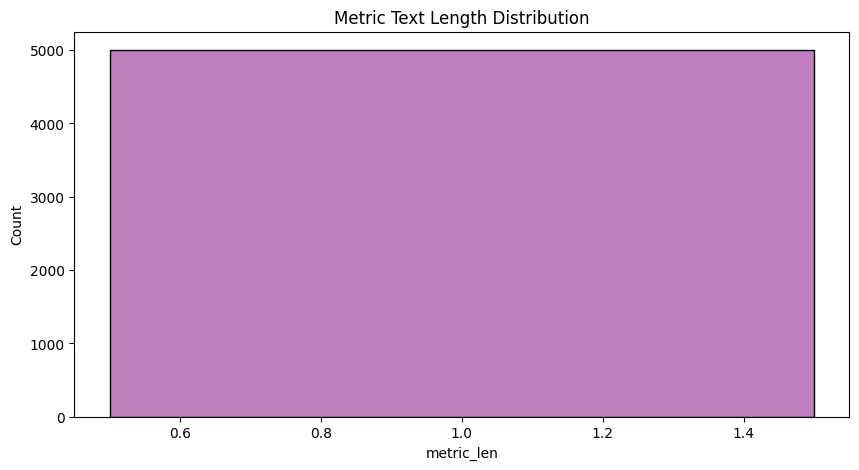

count    5000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: metric_len, dtype: float64

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['metric_len'], kde=True, color='purple')
plt.title("Metric Text Length Distribution")
plt.show()

df['metric_len'].describe()


Token indices sequence length is longer than the specified maximum sequence length for this model (661 > 512). Running this sequence through the model will result in indexing errors


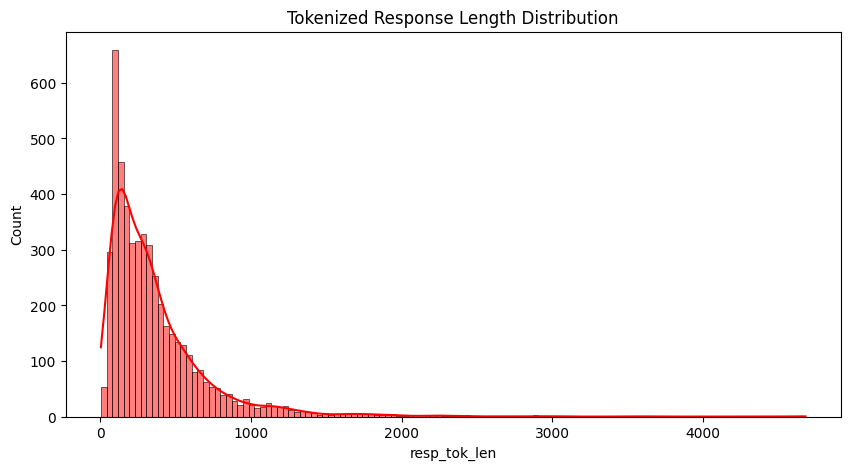

,resp_tok_len,metric_tok_len
count,5000.000000,5000.000000
mean,362.638200,12.261600
std,347.810627,4.916706
min,3.000000,3.000000
25%,134.000000,9.000000
50%,272.000000,13.000000
75%,459.000000,15.000000
max,4681.000000,28.000000


In [13]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

df['resp_tok_len'] = df['response'].astype(str).apply(lambda x: len(tokenizer(x)['input_ids']))
df['metric_tok_len'] = df['metric_name'].astype(str).apply(lambda x: len(tokenizer(x)['input_ids']))

plt.figure(figsize=(10,5))
sns.histplot(df['resp_tok_len'], kde=True, color='red')
plt.title("Tokenized Response Length Distribution")
plt.show()

df[['resp_tok_len','metric_tok_len']].describe()


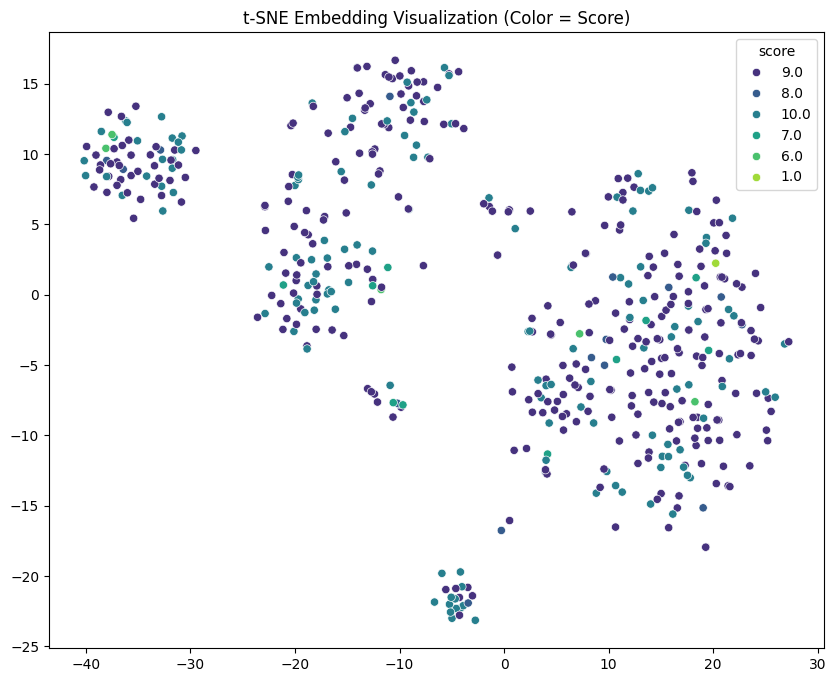

In [20]:
from sklearn.manifold import TSNE
import random
import torch
from transformers import AutoModel

sample_df = df.sample(500)  # sample for visualization

embeddings = []
for txt in sample_df['response']:
    tok = tokenizer(txt, return_tensors='pt', truncation=True, max_length=64)
    with torch.no_grad():
        emb = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")(**tok).last_hidden_state[0,0].numpy()
    embeddings.append(emb)

embeddings = np.vstack(embeddings)

tsne = TSNE(n_components=2, random_state=42)
emb2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10,8))
sns.scatterplot(x=emb2d[:,0], y=emb2d[:,1], hue=sample_df['score'], palette="viridis")
plt.title("t-SNE Embedding Visualization (Color = Score)")
plt.show()
